<a href="https://colab.research.google.com/github/Mahak-G/Parkinson-Analysis/blob/main/Parkinson_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [2]:
data=pd.read_csv('/content/parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
inputs=data.loc[:,data.columns!='status'].values[:,1:]
output=data.loc[:,'status'].values

In [4]:
print(output[output==1].shape[0],output[output==0].shape[0])
# 147 ones=pd and 48 zeros=healthy

147 48


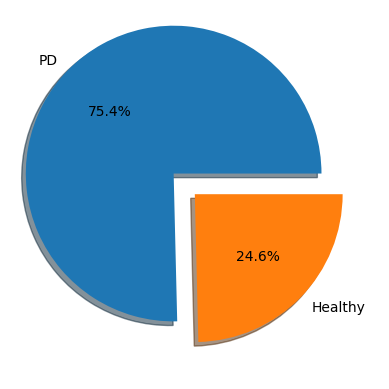

In [10]:
y = np.array([output[output==1].shape[0], output[output==0].shape[0]])
mylabels = ["PD", "Healthy"]
myexplode = [0.2, 0]
plt.pyplot.pie(y, labels = mylabels, autopct='%1.1f%%',explode = myexplode, shadow = True)
plt.pyplot.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(inputs)
y=output

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
print(x_train)

[[-0.31872482 -0.56497545 -0.81276267 ... -0.14534047 -0.20731822
  -0.50930766]
 [ 0.13906807 -0.60979005  0.29086785 ... -0.12286057 -0.15405531
  -0.64370335]
 [-0.72165429 -0.9001235  -0.55532143 ...  0.34951454 -0.11385722
  -0.3179683 ]
 ...
 [-0.43371446 -0.73682803 -0.99392034 ... -0.10230765 -0.22747154
  -0.24731789]
 [-0.81292644 -0.57599437 -0.85616083 ...  0.03813209  0.26616154
  -0.27520773]
 [-0.68508255 -0.91441257 -0.5030571  ... -0.13707428 -0.50925054
  -0.42203849]]


In [15]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [16]:
from sklearn.metrics import accuracy_score

In [72]:
models = [RandomForestClassifier(max_depth=2, random_state=0), XGBClassifier(), SVC(kernel='rbf')]

for i in range(len(models)):
  models[i].fit(x_train,y_train)
  print(f'{models[i]} : ')

  y_pred=models[i].predict(x_test)
  print('Accuracy score:',accuracy_score(y_test, y_pred)*100)

RandomForestClassifier(max_depth=2, random_state=0) : 
Accuracy score: 84.61538461538461
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Accuracy score: 94.87179487179486
SVC() : 
Accuracy score: 87.17948717948718


In [22]:
for i in range(len(models)):
  from sklearn import metrics
  print(metrics.classification_report(y_test, models[i].predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.86      1.00      0.93        32

    accuracy                           0.87        39
   macro avg       0.93      0.64      0.69        39
weighted avg       0.89      0.87      0.84        39



In [23]:
import tensorflow as tf

In [24]:
ann=tf.keras.models.Sequential()

In [67]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [68]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
ann.fit(x_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100


8/8 [==============================] - 2s 3ms/step - loss: 0.6291 - accuracy: 0.7372
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.7372
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.7372
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5894 - accuracy: 0.7372
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5834 - accuracy: 0.7372
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7372
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7372
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7372
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7372
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7372
Epoch 11/100
8/8 [=======================

In [70]:
y_pred_ann=ann.predict(x_test)
def custom_activation(x):
    return 1 if x >= 0.5 else 0
y_pred_b = [custom_activation(val) for val in y_pred_ann]


2/2 [==============================] - 0s 7ms/step


In [71]:
print(metrics.classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        32

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


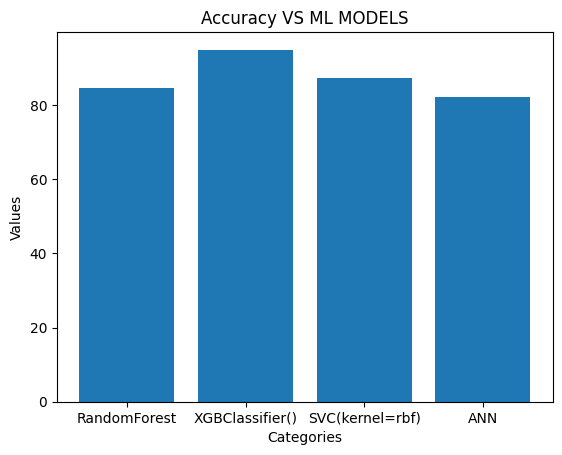

In [75]:
categories = ['RandomForest', 'XGBClassifier()', 'SVC(kernel=rbf)','ANN']
values=[0,0,0,0]
for i in range(len(models)):
  y_pred=models[i].predict(x_test)
  values[i]=accuracy_score(y_test, y_pred)*100

values[3]=accuracy_score(y_test, y_pred_b)*100

plt.pyplot.bar(categories, values)

plt.pyplot.xlabel('Categories')
plt.pyplot.ylabel('Values')
plt.pyplot.title('Accuracy VS ML MODELS')

plt.pyplot.show()